In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import apply_cats, proc_df
from fastai.column_data import *
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import dill as pickle

import numpy as np
np.set_printoptions(threshold=50, edgeitems=20)
data_path=Path('data/')
PATH = data_path

In [3]:
lb=LabelEncoder()
def LabelEncoding_Cat(df):
    df=df.copy()
    Cat_Var=df.select_dtypes('object').columns.tolist()
    for col in Cat_Var:
        df[col]=lb.fit_transform(df[col].astype('str'))
    return df    

def Fill_NA(df):
    df=df.copy()
    Num_Features=df.select_dtypes(['float64','int64']).columns.tolist()
    df[Num_Features]= df[Num_Features].fillna(123456789)
    return df


# Format and clean data

In [4]:
def read_csv(file_name):
    return pd.read_csv(data_path/file_name).pipe(LabelEncoding_Cat)

In [5]:
join_key = "SK_ID_CURR"

In [6]:
# bureau = (pd.read_csv(data_path/"bureau_balance.csv")
#          .pipe(LabelEncoding_Cat))

# cred_card_bal = (pd.read_csv(data_path/"credit_card_balance.csv")
#                .pipe(LabelEncoding_Cat))

# pos_cash_bal = (pd.read_csv(data_path/"POS_CASH_balance.csv")
#                .pipe(LabelEncoding_Cat))
               
# prev = (pd.read_csv(data_path/"previous_application.csv") 
#                .pipe(LabelEncoding_Cat))


In [7]:
bureau = read_csv("bureau_balance.csv")
cred_card_bal = read_csv("credit_card_balance.csv")
pos_cash_bal = read_csv("POS_CASH_balance.csv")
prev = read_csv("previous_application.csv")

In [8]:
application_train = read_csv("application_train.csv")

In [6]:
application_test = read_csv("application_test.csv")

# dropping features with small variance

In [10]:
features_with_small_variance = application_train.columns[(application_train.std(axis = 0) < .01).values]
application_train[features_with_small_variance].describe().T

,count,mean,std,min,25%,50%,75%,max
FLAG_MOBIL,307511.0,0.999997,0.001803,0.0,1.0,1.0,1.0,1.0
FLAG_DOCUMENT_2,307511.0,0.000042,0.006502,0.0,0.0,0.0,0.0,1.0
FLAG_DOCUMENT_4,307511.0,0.000081,0.009016,0.0,0.0,0.0,0.0,1.0
FLAG_DOCUMENT_10,307511.0,0.000023,0.004771,0.0,0.0,0.0,0.0,1.0
FLAG_DOCUMENT_12,307511.0,0.000007,0.002550,0.0,0.0,0.0,0.0,1.0


In [11]:
remove_features = [    
    'FLAG_MOBIL',
    'FLAG_DOCUMENT_2',
    'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_12',
]

In [12]:
features_with_small_variance = application_test.columns[(application_test.std(axis = 0) < .01).values]
application_test[features_with_small_variance].describe().T

,count,mean,std,min,25%,50%,75%,max
FLAG_MOBIL,48744.0,0.999979,0.004529,0.0,1.0,1.0,1.0,1.0
FLAG_DOCUMENT_2,48744.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
FLAG_DOCUMENT_7,48744.0,0.000041,0.006405,0.0,0.0,0.0,0.0,1.0
FLAG_DOCUMENT_10,48744.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
FLAG_DOCUMENT_12,48744.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
FLAG_DOCUMENT_13,48744.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
FLAG_DOCUMENT_14,48744.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
FLAG_DOCUMENT_15,48744.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
FLAG_DOCUMENT_16,48744.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
FLAG_DOCUMENT_17,48744.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [13]:
application_train.drop(features_with_small_variance, axis = 1, inplace = True)
application_test.drop(features_with_small_variance, axis = 1, inplace = True)
print(application_train.shape, application_test.shape)

(307511, 109) (48744, 108)


In [14]:
list(features_with_small_variance)

['FLAG_MOBIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [15]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,1,1730.430,17145.0,17145.0,0.0,17145.0,2,15,...,2,12.0,4,13,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,0,25188.615,607500.0,679671.0,NaN,607500.0,4,11,...,10,36.0,2,7,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,0,15060.735,112500.0,136444.5,NaN,112500.0,5,11,...,10,12.0,1,6,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,0,47041.335,450000.0,470790.0,NaN,450000.0,1,7,...,10,12.0,4,8,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,0,31924.395,337500.0,404055.0,NaN,337500.0,4,9,...,10,24.0,1,3,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
len(prev)

1670214

In [17]:
joined_df = pd.merge(application_train, prev, how='left', on=join_key)

In [18]:
len(application_train)

307511

In [19]:
len(joined_df)

1430155

In [20]:
joined_df.loc[joined_df['SK_ID_CURR'] == 271877]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
686691,271877,0,0,0,0,1,1,225000.0,533668.5,25803.0,...,2.0,12.0,4.0,13.0,365243.0,-42.0,300.0,-42.0,-37.0,0.0
686692,271877,0,0,0,0,1,1,225000.0,533668.5,25803.0,...,5.0,36.0,3.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
686693,271877,0,0,0,0,1,1,225000.0,533668.5,25803.0,...,5.0,12.0,4.0,11.0,365243.0,-512.0,-182.0,-392.0,-387.0,0.0


In [21]:
len(application_test.columns)

108

In [22]:
set(application_train.columns) - set(application_test.columns)

{'TARGET'}

In [23]:
# joined_df1 = pd.merge(application_train, prev, on=['SK_ID_CURR', 'SK_ID_PREV'])

In [24]:
len(application_train.columns)

109

In [25]:
len(application_train)

307511

In [26]:
len(joined_df.columns)

145

In [27]:
len(joined_df)

1430155

In [28]:
pos_cash_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,0,0,0
1,1715348,367990,-33,36.0,35.0,0,0,0
2,1784872,397406,-32,12.0,9.0,0,0,0
3,1903291,269225,-35,48.0,42.0,0,0,0
4,2341044,334279,-35,36.0,35.0,0,0,0


In [29]:
cred_card_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,0,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,0,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,0,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,0,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,0,0,0


In [30]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
bureau.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,6
1,5715448,-1,6
2,5715448,-2,6
3,5715448,-3,6
4,5715448,-4,6


In [32]:
# cred_card_bal.head()

In [33]:
# pos_cash_bal.head()

In [34]:
# prev.head()

In [35]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# application_test.sample(20)['HOUSETYPE_MODE']

In [37]:
list(application_train.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BU

In [38]:
application_train.columns.to_series().groupby(application_train.dtypes).groups

{dtype('int64'): Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
        'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE',
        'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
        'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
        'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
        'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT',
        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
        'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
        'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
        'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
        'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
        'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
        'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',

In [39]:
samp_size = len(application_train)

In [40]:
train_ratio  = 0.75
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(application_train)))

In [41]:
val_idx[:10]

[230633,
 230634,
 230635,
 230636,
 230637,
 230638,
 230639,
 230640,
 230641,
 230642]

In [42]:
type_vars = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
        'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
        'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
        'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'
]

discrete_vars = [
    "NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", 
    "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", 
    "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", 
    "HOUR_APPR_PROCESS_START", "ORGANIZATION_TYPE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE", "REGION_RATING_CLIENT", 
    "REGION_RATING_CLIENT_W_CITY", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", 
    "FLAG_PHONE", "FLAG_EMAIL", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", 
    "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", 
    "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", 
    "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", 
    "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", 
    "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", 
    "FONDKAPREMONT_MODE", "HOUSETYPE_MODE"
]

cat_vars = list(set(discrete_vars) - set(features_with_small_variance))

# Process

In [43]:
contin_vars = list((set(application_train.columns) - set(cat_vars)) - set(["TARGET"]))

In [44]:
application_train["TARGET"] = application_train["TARGET"].fillna(0).astype('int')

In [45]:
# len(list(set(application_train.columns) - set("TARGET")))
len(list(set(application_train.columns) - set(["TARGET"])))

108

In [46]:
train_df = application_train[list(set(application_train.columns) - set(["TARGET"]))]
y = application_train["TARGET"]

In [47]:
for v in contin_vars:
    application_test[v] = application_test[v].fillna(0).astype('float32')
    application_train[v] = application_train[v].fillna(0).astype('float32')
    train_df[v] = train_df[v].fillna(0).astype('float32')

/home/cheeseblubber/anaconda3/envs/fastai-latest/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [48]:
for col in cat_vars:
    application_test[col] = application_test[col].astype('category')
    application_train[col] = application_train[col].astype('category')
    train_df[col] = train_df[col].astype('category')    

application_train['TARGET'] = application_train['TARGET'].astype('category')

/home/cheeseblubber/anaconda3/envs/fastai-latest/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [49]:
cat_sz = [(c, len(application_train[c].cat.categories)+1) for c in cat_vars]

In [50]:
apply_cats(application_test, application_train)

In [51]:
len(cat_sz)

38

In [52]:
cat_sz

[('FLAG_OWN_CAR', 3),
 ('FLAG_OWN_REALTY', 3),
 ('FLAG_PHONE', 3),
 ('LIVE_REGION_NOT_WORK_REGION', 3),
 ('FLAG_DOCUMENT_9', 3),
 ('FLAG_WORK_PHONE', 3),
 ('HOUSETYPE_MODE', 5),
 ('NAME_CONTRACT_TYPE', 3),
 ('REG_CITY_NOT_WORK_CITY', 3),
 ('CODE_GENDER', 4),
 ('FLAG_CONT_MOBILE', 3),
 ('FLAG_DOCUMENT_11', 3),
 ('NAME_EDUCATION_TYPE', 6),
 ('HOUR_APPR_PROCESS_START', 25),
 ('REGION_RATING_CLIENT', 4),
 ('WEEKDAY_APPR_PROCESS_START', 8),
 ('WALLSMATERIAL_MODE', 9),
 ('NAME_HOUSING_TYPE', 7),
 ('NAME_INCOME_TYPE', 9),
 ('REGION_RATING_CLIENT_W_CITY', 4),
 ('NAME_TYPE_SUITE', 9),
 ('OCCUPATION_TYPE', 20),
 ('FONDKAPREMONT_MODE', 6),
 ('FLAG_DOCUMENT_8', 3),
 ('FLAG_DOCUMENT_6', 3),
 ('REG_REGION_NOT_LIVE_REGION', 3),
 ('FLAG_DOCUMENT_5', 3),
 ('FLAG_EMP_PHONE', 3),
 ('FLAG_DOCUMENT_4', 3),
 ('EMERGENCYSTATE_MODE', 4),
 ('FLAG_EMAIL', 3),
 ('LIVE_CITY_NOT_WORK_CITY', 3),
 ('NAME_FAMILY_STATUS', 7),
 ('FLAG_DOCUMENT_18', 3),
 ('REG_REGION_NOT_WORK_REGION', 3),
 ('ORGANIZATION_TYPE', 59),
 ('

In [53]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [125]:
train_df, y, _, mapper = proc_df(application_train, y_fld="TARGET", do_scale=True, skip_flds=["SK_ID_CURR"])

In [123]:
blah = proc_df(application_train, y_fld="TARGET", do_scale=True, skip_flds=["SK_ID_CURR"])

In [172]:
# test_df, _, _ = proc_df(application_test, do_scale=True, mapper=mapper)
test_df, _, nas, mapper = proc_df(application_test, do_scale=True,
                                  mapper=mapper)


In [173]:
bs = 250

In [174]:
y[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [175]:
# len(df.columns) - len(cat_vars)

In [176]:
len(application_train.columns) - len(cat_vars)

71

# Train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,1,1,2,-0.577538,-0.142533,-0.075097,-0.451692,-0.237829,7,...,1,1,1,1,-0.070987,-0.058766,-0.155838,-0.269947,-0.308620,-0.885565
1,1,2,1,2,-0.577538,-0.294354,-0.934825,-0.671811,-0.968283,7,...,1,1,1,1,-0.070987,-0.058766,-0.155838,-0.269947,-0.308620,0.730973
2,1,2,2,2,-0.577538,0.142129,0.159602,2.943856,0.249141,8,...,2,1,1,1,-0.070987,-0.058766,-0.155838,-0.269947,1.035362,1.269819
3,1,1,1,2,2.192084,0.616567,2.424840,1.511684,2.805729,7,...,1,1,1,1,-0.070987,-0.058766,-0.155838,-0.269947,-0.308620,0.730973
4,1,2,2,1,0.807273,0.047242,0.065776,0.342165,0.236966,7,...,1,1,1,1,-0.070987,-0.058766,-0.155838,-0.269947,-0.308620,-0.885565
5,1,1,2,2,-0.577538,0.426792,0.896077,0.516957,0.736110,7,...,2,1,1,1,-0.070987,-0.058766,-0.155838,-0.269947,1.035362,0.192127
6,1,2,2,2,2.192084,0.047242,-0.247969,-0.344271,-0.444791,7,...,1,1,1,1,-0.070987,-0.058766,-0.155838,-0.269947,-0.308620,-0.346719
7,1,2,1,2,-0.577538,-0.009691,-1.041084,-0.889136,-0.968283,7,...,2,1,1,1,-0.070987,-0.058766,-0.155838,-0.269947,-0.308620,0.192127
8,1,1,1,2,-0.577538,0.616567,-0.581704,0.127634,-0.603056,7,...,1,1,1,1,-0.070987,-0.058766,-0.155838,-0.269947,-0.308620,1.808665
9,1,1,2,2,0.807273,-0.028668,-1.376496,-1.501993,-1.333510,2,...,1,1,1,1,-0.070987,-0.058766,-0.155838,-0.269947,-0.308620,0.192127


In [133]:
train_df.to_feather(f'{PATH}train_df')
test_df.to_feather(f'{PATH}test_df')

In [134]:
pickle.dump(val_idx, open(f'{PATH}val_idx','wb'))

In [135]:
pickle.dump(y, open(f'{PATH}y','wb'))
pickle.dump(emb_szs, open(f'{PATH}emb_szs','wb'))
pickle.dump(cat_vars, open(f'{PATH}cat_vars','wb'))
pickle.dump(contin_vars, open(f'{PATH}contin_vars','wb'))

In [136]:
contin_vars

['LIVINGAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'YEARS_BUILD_MODE',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_AVG',
 'ENTRANCES_MODE',
 'EXT_SOURCE_1',
 'LANDAREA_AVG',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'YEARS_BEGINEXPLUATATION_MODE',
 'COMMONAREA_AVG',
 'FLOORSMAX_MEDI',
 'LIVINGAREA_AVG',
 'FLOORSMIN_MEDI',
 'DAYS_ID_PUBLISH',
 'FLOORSMIN_AVG',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'NONLIVINGAREA_MEDI',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'ELEVATORS_MEDI',
 'FLOORSMAX_AVG',
 'LIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'AMT_INCOME_TOTAL',
 'ELEVATORS_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'ENTRANCES_AVG',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NONLIVINGAPARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MEDI',
 'LANDAREA_MEDI',
 'FLOORSMAX

In [137]:
from fastai.structured import apply_cats, proc_df
from fastai.column_data import *
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import dill as pickle
from sklearn.metrics import roc_curve, auc

import numpy as np
np.set_printoptions(threshold=50, edgeitems=20)
data_path=Path('data/')
PATH = data_path

In [138]:
train_df = pd.read_feather(f'{PATH}train_df')
test_df = pd.read_feather(f'{PATH}test_df')

In [139]:
val_idx = pickle.load(open(f'{PATH}val_idx','rb'))
cat_vars = pickle.load(open(f'{PATH}cat_vars','rb'))
emb_szs = pickle.load(open(f'{PATH}emb_szs','rb'))

In [140]:
y = pickle.load(open(f'{PATH}y','rb'))

In [141]:
y.shape

(307511,)

In [142]:
md = ColumnarModelData.from_data_frame(
    PATH, val_idx, train_df, y.astype(np.int32), 
    cat_flds=cat_vars, bs=128, is_reg=False, test_df=test_df,
    is_multi=False
)

In [143]:
y_range = (0, 1)

In [144]:
m = md.get_learner(emb_szs, len(train_df.columns)-len(cat_vars),
                   0.04, 2, [200,50], drops=[0.1, 0.05])

In [145]:
m.lr_find()

 99%|█████████▉| 1782/1802 [00:14<00:00, 121.84it/s, loss=1.06] 

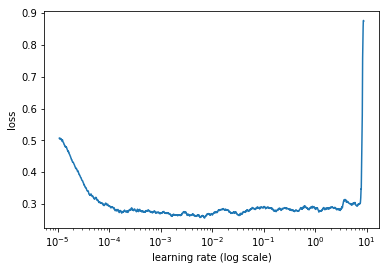

In [147]:
m.sched.plot(10)

In [148]:
lr = 1e-4

 99%|█████████▉| 1782/1802 [00:30<00:00, 59.40it/s, loss=1.06] 

In [149]:
m.fit(lr, 2, cycle_len=2)

epoch      trn_loss   val_loss                                  
    0      0.265824   0.259237  
    1      0.260317   0.25839                                   
    2      0.26369    0.256341                                  
    3      0.260565   0.255712                                  


[array([0.25571])]

In [150]:
m.fit(lr/10, 1, cycle_len=2)

epoch      trn_loss   val_loss                                  
    0      0.268694   0.255633  
    1      0.252861   0.255583                                  


[array([0.25558])]

In [151]:
m.fit(lr/10, 2, cycle_len=2)

epoch      trn_loss   val_loss                                  
    0      0.269746   0.255448  
    1      0.260903   0.255397                                  
    2      0.265658   0.255321                                  
    3      0.256628   0.255208                                  


[array([0.25521])]

In [152]:
m.fit(lr/20, 2)

epoch      trn_loss   val_loss                                  
    0      0.262636   0.255221  
    1      0.263538   0.255087                                  


[array([0.25509])]

In [153]:
m.fit(lr/20, 2, cycle_len=3, best_save_name="best_home_default")

epoch      trn_loss   val_loss                                  
    0      0.256649   0.254995  
    1      0.262448   0.254945                                  
    2      0.25754    0.254941                                  
    3      0.253146   0.254834                                  
    4      0.257039   0.254816                                  
    5      0.266452   0.254808                                  


[array([0.25481])]

In [155]:
m.fit(lr/20, 4, wds=1e-7, cycle_len=3, best_save_name="best_home_default")

epoch      trn_loss   val_loss                                  
    0      0.25996    0.254738  
    1      0.25351    0.254724                                  
    2      0.255564   0.254712                                  
    3      0.259987   0.254685                                  
    4      0.24298    0.254616                                  
    5      0.264277   0.254606                                  
    6      0.260177   0.254547                                  
    7      0.255109   0.254493                                  
    8      0.264165   0.254492                                  
    9      0.257253   0.254471                                  
    10     0.259218   0.254434                                  
    11     0.252888   0.254439                                  


[array([0.25444])]

In [156]:
m.save('val0')

In [157]:
m.load('val0')

# Eval

In [158]:
x1,y1=m.predict_with_targs()

In [159]:
pred_test=m.predict(True)

In [160]:
pred_test1=m.predict(True)

In [185]:
len(pred_test1)

48744

In [184]:
len(application_test)

48744

In [161]:
np.exp(pred_test1)

array([[0.96425, 0.03575],
       [0.8789 , 0.1211 ],
       [0.95256, 0.04744],
       [0.9622 , 0.0378 ],
       [0.85846, 0.14154],
       [0.95459, 0.04541],
       [0.96552, 0.03448],
       [0.95053, 0.04947],
       [0.97978, 0.02022],
       [0.94149, 0.05851],
       [0.95054, 0.04946],
       [0.94184, 0.05816],
       [0.90681, 0.09319],
       [0.94133, 0.05867],
       [0.90499, 0.09501],
       [0.92551, 0.07449],
       [0.95651, 0.04349],
       [0.97197, 0.02803],
       [0.90848, 0.09152],
       [0.9375 , 0.0625 ],
       ...,
       [0.89601, 0.10399],
       [0.90614, 0.09386],
       [0.93872, 0.06128],
       [0.95391, 0.04609],
       [0.96709, 0.03291],
       [0.91316, 0.08684],
       [0.9086 , 0.0914 ],
       [0.97563, 0.02437],
       [0.85183, 0.14817],
       [0.95885, 0.04115],
       [0.92604, 0.07396],
       [0.95045, 0.04955],
       [0.97805, 0.02195],
       [0.94552, 0.05448],
       [0.94006, 0.05994],
       [0.95516, 0.04484],
       [0.88703,

In [162]:
# WHY EXP
pred_test = np.exp(pred_test)
pred_test

array([[0.96425, 0.03575],
       [0.8789 , 0.1211 ],
       [0.95256, 0.04744],
       [0.9622 , 0.0378 ],
       [0.85846, 0.14154],
       [0.95459, 0.04541],
       [0.96552, 0.03448],
       [0.95053, 0.04947],
       [0.97978, 0.02022],
       [0.94149, 0.05851],
       [0.95054, 0.04946],
       [0.94184, 0.05816],
       [0.90681, 0.09319],
       [0.94133, 0.05867],
       [0.90499, 0.09501],
       [0.92551, 0.07449],
       [0.95651, 0.04349],
       [0.97197, 0.02803],
       [0.90848, 0.09152],
       [0.9375 , 0.0625 ],
       ...,
       [0.89601, 0.10399],
       [0.90614, 0.09386],
       [0.93872, 0.06128],
       [0.95391, 0.04609],
       [0.96709, 0.03291],
       [0.91316, 0.08684],
       [0.9086 , 0.0914 ],
       [0.97563, 0.02437],
       [0.85183, 0.14817],
       [0.95885, 0.04115],
       [0.92604, 0.07396],
       [0.95045, 0.04955],
       [0.97805, 0.02195],
       [0.94552, 0.05448],
       [0.94006, 0.05994],
       [0.95516, 0.04484],
       [0.88703,

In [163]:
pred_test[:,0]

array([0.96425, 0.8789 , 0.95256, 0.9622 , 0.85846, 0.95459, 0.96552, 0.95053, 0.97978, 0.94149, 0.95054,
       0.94184, 0.90681, 0.94133, 0.90499, 0.92551, 0.95651, 0.97197, 0.90848, 0.9375 , ..., 0.89601,
       0.90614, 0.93872, 0.95391, 0.96709, 0.91316, 0.9086 , 0.97563, 0.85183, 0.95885, 0.92604, 0.95045,
       0.97805, 0.94552, 0.94006, 0.95516, 0.88703, 0.96113, 0.9434 , 0.92314], dtype=float32)

(array([   13.,    44.,   170.,   377.,   850.,  1652.,  3399.,  7202., 17523., 17514.]),
 array([0.52898, 0.57605, 0.62312, 0.67019, 0.71726, 0.76433, 0.8114 , 0.85847, 0.90554, 0.95261, 0.99968]),
 <a list of 10 Patch objects>)

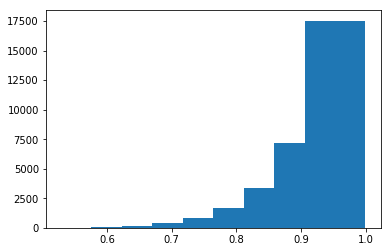

In [164]:
matplotlib.pyplot.hist(pred_test[:,0])

In [165]:
pred_test[:,0]

array([0.96425, 0.8789 , 0.95256, 0.9622 , 0.85846, 0.95459, 0.96552, 0.95053, 0.97978, 0.94149, 0.95054,
       0.94184, 0.90681, 0.94133, 0.90499, 0.92551, 0.95651, 0.97197, 0.90848, 0.9375 , ..., 0.89601,
       0.90614, 0.93872, 0.95391, 0.96709, 0.91316, 0.9086 , 0.97563, 0.85183, 0.95885, 0.92604, 0.95045,
       0.97805, 0.94552, 0.94006, 0.95516, 0.88703, 0.96113, 0.9434 , 0.92314], dtype=float32)

In [166]:
res = predict_with_targs_(m.model, md.test_dl)

In [109]:
# np.concatenate(res[0])

In [110]:
a1, b1 = np.concatenate(a), np.concatenate(b)

NameError: name 'a' is not defined

In [111]:
data  = list(iter(md.test_dl))

In [186]:
application_test['TARGET']=pred_test[:,1]

In [187]:
csv_fn=f'{PATH}/tmp/sub.csv'

In [192]:
application_test['SK_ID_CURR'] = application_test['SK_ID_CURR'].astype(int)

In [193]:
application_test[['SK_ID_CURR','TARGET']].to_csv(csv_fn, index=False)

In [194]:
FileLink(csv_fn)

/home/cheeseblubber/workspace/competition/home-default-credit/data/tmp/sub.csv